# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

First import the data from the .csv file provided and assign it to a variable named `diamonds` and **drop the column with the index.**

In [2]:
#your code here
diamonds = pd.read_csv('diamonds.csv', index_col=0)

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
7760,1.03,Ideal,J,VS2,61.6,57.0,4283,6.52,6.47,4.00
26891,2.02,Premium,I,VS2,59.6,60.0,16861,8.25,8.20,4.90
8042,0.39,Ideal,J,VS2,61.4,57.0,581,4.66,4.72,2.88
41147,0.50,Very Good,F,SI1,61.0,60.0,1197,5.08,5.11,3.11
46829,0.58,Ideal,F,VS2,60.6,56.0,1809,5.41,5.44,3.29


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
## xyz == 0 ??  perahps missing values treated
diamonds.loc[diamonds['x'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [8]:
diamonds.loc[diamonds['x'] == 0].shape

(8, 10)

In [9]:
diamonds.loc[diamonds['y'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [10]:
diamonds.loc[diamonds['y'] == 0].shape

(7, 10)

In [11]:
diamonds.loc[diamonds['z'] == 0].shape

(20, 10)

In [12]:
## It seems that there are quite a few missing values of diamonds dimensions. perhaps it's best if we keep our analysis 3-dimensional and drop these values

diamonds = diamonds.loc[(diamonds['z'] != 0) & (diamonds['y'] != 0) & (diamonds['x'] != 0)]

In [13]:
diamonds.loc[(diamonds['z'] == 0) | (diamonds['y'] == 0) | (diamonds['x'] == 0)]
## All gucci

,carat,cut,color,clarity,depth,table,price,x,y,z


In [14]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [15]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [16]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [17]:
# I think the cut, color and clarity make more sense as a numerical variable since in var_descript is explicit that they're ordinal

In [18]:
diamonds['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [19]:
diamonds['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

In [20]:
diamonds['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

In [21]:
## Will create dicts and evaluate these qualities as ordinal, ascending order of quality
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color = ['D', 'E', 'F', 'G', 'H', 'I', 'J'][::-1]
cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [22]:
clarity_dict = {k : i+1 for (i, k) in enumerate(clarity)}

In [23]:
cut_dict = {k : i+1 for (i, k) in enumerate(cut)}

In [24]:
color_dict = {k : i+1 for (i, k) in enumerate(color)}

In [25]:
diamonds['cut'] = diamonds['cut'].map(cut_dict)

In [26]:
diamonds['color'] = diamonds['color'].map(color_dict)

In [27]:
diamonds['clarity'] = diamonds['clarity'].map(clarity_dict)

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [28]:
#your code here
diamonds.shape

(53920, 10)

The `clarity` column is confusing because we are not diamond experts. Let's modify this column with a new scale that is more understandable for us.

**Modify `clarity` column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [29]:
#your code here

## did it already but from 1 to len(clarity)

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [30]:
#your code here
## did it already but from 1 to len(color)

With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [31]:
#your code here
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 10 columns):
carat      53920 non-null float64
cut        53920 non-null int64
color      53920 non-null int64
clarity    53920 non-null int64
depth      53920 non-null float64
table      53920 non-null float64
price      53920 non-null int64
x          53920 non-null float64
y          53920 non-null float64
z          53920 non-null float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


In [32]:
diamonds.shape[0]

53920

In [33]:
## yes, cool. but i'd rather use the isna().sum() method. it's prettier imho

In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [34]:
#your code here
diamonds.info()

## yes. info is pretty much isna().sum() + dtypes
## everything is as expected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 10 columns):
carat      53920 non-null float64
cut        53920 non-null int64
color      53920 non-null int64
clarity    53920 non-null int64
depth      53920 non-null float64
table      53920 non-null float64
price      53920 non-null int64
x          53920 non-null float64
y          53920 non-null float64
z          53920 non-null float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [35]:
#your code and comments here

diamonds.describe()

## I see summary statistics for all the var distributions. values_count, mean, standart deviation, quartile breakdown with min and max included
## 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,3.904228,4.405972,4.051502,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.116579,1.701272,1.647005,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [36]:
#your code here

# i dropped those 7 entries 

As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [37]:
#your code here
## oh, I see. I'm dumb
diamonds = pd.read_csv('diamonds.csv', index_col=0)
diamonds['cut'] = diamonds['cut'].map(cut_dict)
diamonds['color'] = diamonds['color'].map(color_dict)
diamonds['clarity'] = diamonds['clarity'].map(clarity_dict)


## these are the entries where we can't infer the z value
diamonds.loc[(diamonds['y'] == 0) | (diamonds['x'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
11183,1.07,5,5,2,61.6,56.0,4954,0.0,6.62,0.0
11964,1.00,3,3,4,63.3,53.0,5139,0.0,0.00,0.0
15952,1.14,1,4,5,57.5,67.0,6381,0.0,0.00,0.0
24521,1.56,5,4,4,62.2,54.0,12800,0.0,0.00,0.0
26244,1.20,4,7,7,62.1,59.0,15686,0.0,0.00,0.0
27430,2.25,4,3,2,62.8,59.0,18034,0.0,0.00,0.0
49557,0.71,2,5,2,64.1,60.0,2130,0.0,0.00,0.0
49558,0.71,2,5,2,64.1,60.0,2130,0.0,0.00,0.0


In [38]:
## let's keep these and treat
diamonds.loc[(diamonds['z'] == 0) & ((diamonds['x'] != 0) & (diamonds['y'] != 0))]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,4,4,2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,4,3,1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,4,4,2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,4,5,2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,2,4,1,64.0,61.0,4731,7.15,7.04,0.0
13602,1.15,5,4,4,59.2,56.0,5564,6.88,6.83,0.0
24395,2.18,4,3,2,59.4,61.0,12631,8.49,8.45,0.0
26124,2.25,4,2,3,61.3,58.0,15397,8.52,8.42,0.0
27113,2.20,4,3,3,61.2,59.0,17265,8.42,8.37,0.0
27504,2.02,4,3,4,62.7,53.0,18207,8.02,7.95,0.0


In [39]:
diamonds.loc[(diamonds['z'] == 0) & ((diamonds['x'] != 0) & (diamonds['y'] != 0))]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,4,4,2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,4,3,1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,4,4,2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,4,5,2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,2,4,1,64.0,61.0,4731,7.15,7.04,0.0
13602,1.15,5,4,4,59.2,56.0,5564,6.88,6.83,0.0
24395,2.18,4,3,2,59.4,61.0,12631,8.49,8.45,0.0
26124,2.25,4,2,3,61.3,58.0,15397,8.52,8.42,0.0
27113,2.20,4,3,3,61.2,59.0,17265,8.42,8.37,0.0
27504,2.02,4,3,4,62.7,53.0,18207,8.02,7.95,0.0


In [40]:
diamonds.loc[(diamonds['z'] == 0) & ((diamonds['x'] != 0) & (diamonds['y'] != 0)), 'z']

2208     0.0
2315     0.0
4792     0.0
5472     0.0
10168    0.0
13602    0.0
24395    0.0
26124    0.0
27113    0.0
27504    0.0
27740    0.0
51507    0.0
Name: z, dtype: float64

In [41]:
#Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

def calculate_z(x, y, d):
    return (math.floor(((x+y)*d/2))/100)



In [42]:
diamonds.loc[(diamonds['z'] == 0) & ((diamonds['x'] != 0) & (diamonds['y'] != 0)), 'z'] = diamonds.loc[(diamonds['z'] == 0) & ((diamonds['x'] != 0) & (diamonds['y'] != 0))].apply(lambda row : calculate_z(row.x, row.y, row.depth), axis = 1)

In [43]:
diamonds.iloc[2208-1]

carat         1.00
cut           4.00
color         4.00
clarity       2.00
depth        59.10
table        59.00
price      3142.00
x             6.55
y             6.48
z             3.85
Name: 2208, dtype: float64

In [44]:
calculate_z(diamonds['x'].iloc[0], diamonds['y'].iloc[0], diamonds['depth'].iloc[0])

diamonds.loc[(diamonds['z'] == 0) & ((diamonds['x'] != 0) & (diamonds['y'] != 0))]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [45]:
#diamonds = diamonds.loc[(diamonds['z'] != 0) & (diamonds['x'] != 0) & (diamonds['y'] != 0)]
#diamonds.describe()
# Could drop those, but nooooo

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [46]:
#your code here
diamonds.loc[(diamonds['z'] == 0), 'z'] = diamonds.loc[(diamonds['z'] == 0), 'z'].replace(0, np.nan)

Let's check the data again with the `describe()` method.

In [47]:
#your code here
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.540265
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.702666
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [48]:
### No... the min_val for x and y are still 0 because we only replaced the values in z column. I'd drop the data that has been measured incorrectly since it's a very small part of our sample. but i guess i can put all columns to NaN too
diamonds.loc[(diamonds['y'] == 0), 'y'] = diamonds.loc[(diamonds['y'] == 0), 'y'].replace(0, np.nan)
diamonds.loc[(diamonds['x'] == 0), 'x'] = diamonds.loc[(diamonds['x'] == 0), 'x'].replace(0, np.nan)

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [49]:
#your code
desc = diamonds.describe()
upperbound_outlier = (desc.loc['75%', : ] + (desc.loc['75%', : ] - desc.loc['25%', : ])*1.5)
lowerbound_outlier = (desc.loc['25%', : ] - (desc.loc['75%', : ] - desc.loc['25%', : ])*1.5)

(diamonds > upperbound_outlier).sum() + (diamonds < lowerbound_outlier).sum()

carat      1889
cut           0
color         0
clarity       0
depth      2545
table       605
price      3540
x            24
y            22
z            29
dtype: int64

In [50]:
#your comments here
desc

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53932.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540265
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.119670,1.140339,0.702666
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [51]:
#your code here
diamonds.shape[0]/4

## I'm not gonna be able to eyeball outliers in a 13.5k entries dataset, no use in filtering

13485.0

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

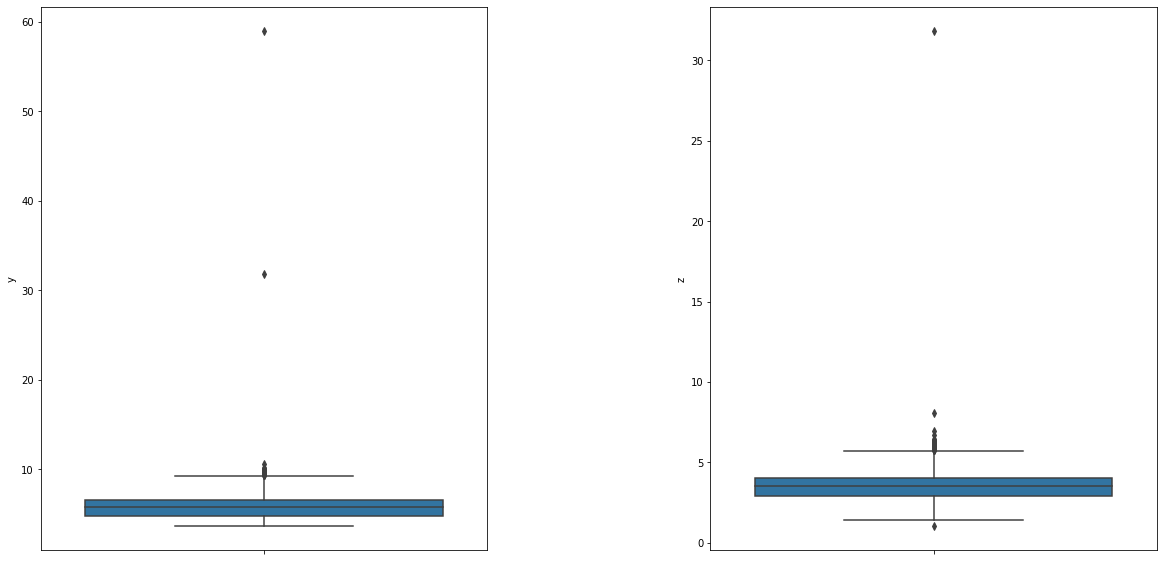

In [52]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values for z higher than 10 in it.


In [53]:
#I filtered for outlier def - upperbound - Y
diamonds.loc[ diamonds['y'] > upperbound_outlier['y'], : ].shape

(22, 10)

In [54]:
#I filtered for outlier def - upperbound - Z
diamonds.loc[ diamonds['z'] > upperbound_outlier['z'], : ].shape

(28, 10)

In [55]:
##It seems that some z outliers have the same index as y outliers.
upper_y_outliers = diamonds.loc[ diamonds['y'] > upperbound_outlier['y'], : ].shape[0]
upper_z_outliers = diamonds.loc[ diamonds['z'] > upperbound_outlier['z'], : ].shape[0]
upper_zandy_outliers = diamonds.loc[ (diamonds['y'] > upperbound_outlier['y']) & (diamonds['z'] > upperbound_outlier['z']), : ].shape[0]

print('There are ', upper_zandy_outliers, ' outliers that are both z and y outliers. So they can\'t be corrected because the correction formula application order would impact the final values. There are ', upper_y_outliers - upper_zandy_outliers, ' y outliers that can be corrected and ', upper_z_outliers - upper_zandy_outliers, ' z outliers that can be corrected.')

There are  14  outliers that are both z and y outliers. So they can't be corrected because the correction formula application order would impact the final values. There are  8  y outliers that can be corrected and  14  z outliers that can be corrected.


In [56]:
#I filtered for outlier def - lowerbound - Y ### NONE
diamonds.loc[ diamonds['y'] < lowerbound_outlier['y'], : ]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [57]:
#I filtered for outlier def - lowerbound - Z ### ONE
diamonds.loc[ diamonds['z'] < lowerbound_outlier['z'], : ]

,carat,cut,color,clarity,depth,table,price,x,y,z
14636,1.07,5,5,3,60.6,57.0,5909,6.62,6.67,1.07


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [58]:
#your code here
diamonds.loc[ diamonds['z'] < lowerbound_outlier['z'], 'z' ] = diamonds.loc[ diamonds['z'] < lowerbound_outlier['z'], : ].apply(lambda row : calculate_z(row.x, row.y, row.depth), axis = 1)
### So, if we are so sure depth is the well measured variable, why dont we apply it to the whole thing and check if there's wrong values?

Let's check if we actually corrected the outlier.

In [59]:
diamonds.loc[diamonds['z'] < lowerbound_outlier['z'], : ]
# it did

,carat,cut,color,clarity,depth,table,price,x,y,z


Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [60]:
diamonds.loc[diamonds['y'] > 10, :]

## we are not using the def of outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,4,3,2,58.9,57.0,12210,8.09,58.90,8.06
25999,4.01,4,2,1,61.0,61.0,15223,10.14,10.10,6.17
27416,5.01,1,1,1,65.5,59.0,18018,10.74,10.54,6.98
27631,4.50,1,1,1,65.8,58.0,18531,10.23,10.16,6.72
49190,0.51,5,6,5,61.8,55.0,2075,5.15,31.80,5.12


In [61]:
#your code here
diamonds.iloc[49189]

carat         0.51
cut           5.00
color         6.00
clarity       5.00
depth        61.80
table        55.00
price      2075.00
x             5.15
y            31.80
z             5.12
Name: 49190, dtype: float64

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [ ]:
#your code here
diamonds.iloc[24068-1].y == diamonds.iloc[24068-1].depth

def calculate_y(x,z,d):
    return math.trunc((200*z)/d-x)

In [76]:
diamonds.loc[diamonds['y'] > 10, 'y'] = diamonds.loc[diamonds['y'] > 10].apply(lambda row : calculate_y(row.x, row.z, row.depth), axis = 1)

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows and comment what you see**

In [77]:
#your thoughts here
diamonds.iloc[24067]

carat          2.00
cut            4.00
color          3.00
clarity        2.00
depth         58.90
table         57.00
price      12210.00
x              8.09
y             19.00
z              8.06
Name: 24068, dtype: float64

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

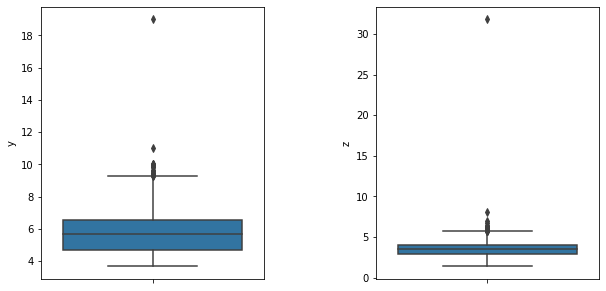

In [78]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [79]:
diamonds.loc[diamonds['y']>10]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,4,3,2,58.9,57.0,12210,8.09,19.0,8.06
49190,0.51,5,6,5,61.8,55.0,2075,5.15,11.0,5.12


In [85]:
diamonds.loc[diamonds['z']> 10]

,carat,cut,color,clarity,depth,table,price,x,y,z
48411,0.51,3,6,5,61.8,54.7,1970,5.12,5.15,31.8


In [89]:
#your thoughts here

## more reasonable, but there are still some outliers. one might consider that the depth has been miscalculated in the case where we initially thought depth was inputed on the y column by mistake.
## but still, some outliers are to be expected. there's a miscalculated value of z with index 48411, I'll correct it

In [90]:

diamonds.loc[diamonds['z']> 10, 'z'] = diamonds.loc[diamonds['z']> 10] .apply(lambda row : calculate_z(row.x, row.y, row.depth), axis = 1)

In [91]:
diamonds.loc[diamonds['z']> 10]

,carat,cut,color,clarity,depth,table,price,x,y,z


**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean.csv``**

In [92]:
#your code here
diamonds.to_csv('diamonds_clean.csv')